In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
%matplotlib inline

In [2]:
from utils.logistics_functions import *
from utils.Run_LCA_model import Run_LCA_model

In [3]:
Energy_optimal = pd.read_csv('results/Energy_m3_optimal_Resin_3.csv')
Energy_grid = pd.read_csv('results/Energy_m3_grid_Resin_3.csv')
Energy_random = pd.read_csv('results/Energy_m3_random_Resin_3.csv')
GHG_optimal = pd.read_csv('results/GHG_m3_optimal_Resin_3.csv')
GHG_grid = pd.read_csv('results/GHG_m3_grid_Resin_3.csv')
GHG_random = pd.read_csv('results/GHG_m3_random_Resin_3.csv')
COST_optimal = pd.read_csv('results/COST_m3_optimal_Resin_3.csv')
COST_grid = pd.read_csv('results/COST_m3_grid_Resin_3.csv')
COST_random = pd.read_csv('results/COST_m3_random_Resin_3.csv')

In [4]:
COST_optimal

,Unnamed: 0,Resin manufacturing,Cartridge manufacturing,Tank manufacturing,Pump operation,Pump manufacturing,Acid manufacturing,Cartridge collection,Trucks manufacturing,Renting facility space,Bottling,Material transport,Fertilizer transport,Fertilizer offset,Labor,n_facilities,sum
0,0,0.83829,0.11624,0.000202,0.000003,0.000105,4.305109,0.151772,0.199906,10.272049,0.004435,0.032099,0.000425,-12.75,1.459557,2,15.920635
1,0,0.83829,0.11624,0.000205,0.000012,0.000366,4.305109,0.133855,0.197240,11.026665,0.004435,0.032269,0.001915,-12.75,3.139744,7,16.656602
2,0,0.83829,0.11624,0.000208,0.000020,0.000628,4.305109,0.130967,0.191910,11.781280,0.004435,0.032439,0.002886,-12.75,4.809487,12,17.404411
3,0,0.83829,0.11624,0.000211,0.000037,0.001151,4.305109,0.123558,0.173252,13.290512,0.004435,0.032778,0.004869,-12.75,8.117642,22,18.890442
4,0,0.83829,0.11624,0.000214,0.000053,0.001675,4.305109,0.118576,0.146598,14.799743,0.004435,0.033118,0.005022,-12.75,11.394464,32,20.369073
5,0,0.83829,0.11624,0.000216,0.000070,0.002198,4.305109,0.113898,0.143932,16.308974,0.004435,0.033457,0.006210,-12.75,14.765283,42,21.873031
6,0,0.83829,0.11624,0.000218,0.000087,0.002722,4.305109,0.111655,0.157259,17.818205,0.004435,0.033797,0.006661,-12.75,18.198766,52,23.394678
7,0,0.83829,0.11624,0.000221,0.000103,0.003245,4.305109,0.109826,0.173252,19.327436,0.004435,0.034137,0.008019,-12.75,21.642693,62,24.920313
8,0,0.83829,0.11624,0.000222,0.000120,0.003768,4.305109,0.105363,0.191910,20.836668,0.004435,0.034476,0.008446,-12.75,25.097064,72,26.445048
9,0,0.83829,0.11624,0.000224,0.000137,0.004292,4.305109,0.103658,0.218564,22.345899,0.004435,0.034816,0.008829,-12.75,28.582767,82,27.980492


In [5]:
GHG_random

,Unnamed: 0,Resin manufacturing,Cartridge manufacturing,Tank manufacturing,Pump operation,Pump manufacturing,Acid manufacturing,Cartridge collection,Trucks manufacturing,Bottling,Material transport,Fertilizer transport,Fertilizer offset,n_facilities,sum
0,0,0.419145,0.258642,0.000182,0.000003,0.000046,4.049991,0.681864,0.012154,0.009868,0.080376,0.003808,-13.5,2,5.516081
1,0,0.419145,0.258642,0.000186,0.000010,0.000161,4.049991,0.623048,0.011674,0.009868,0.081121,0.005968,-13.5,7,5.459815
2,0,0.419145,0.258642,0.000187,0.000017,0.000276,4.049991,0.594754,0.011515,0.009868,0.081867,0.011725,-13.5,12,5.437988
3,0,0.419145,0.258642,0.000190,0.000030,0.000506,4.049991,0.555152,0.010715,0.009868,0.083359,0.015580,-13.5,22,5.403180
4,0,0.419145,0.258642,0.000193,0.000044,0.000737,4.049991,0.535749,0.010395,0.009868,0.084850,0.019137,-13.5,32,5.388753
5,0,0.419145,0.258642,0.000195,0.000058,0.000967,4.049991,0.531658,0.011515,0.009868,0.086341,0.022720,-13.5,42,5.391101
6,0,0.419145,0.258642,0.000196,0.000072,0.001197,4.049991,0.523684,0.012314,0.009868,0.087833,0.022859,-13.5,52,5.385803
7,0,0.419145,0.258642,0.000198,0.000086,0.001427,4.049991,0.510049,0.013754,0.009868,0.089324,0.025540,-13.5,62,5.378025
8,0,0.419145,0.258642,0.000199,0.000100,0.001657,4.049991,0.499070,0.014553,0.009868,0.090816,0.027091,-13.5,72,5.371134
9,0,0.419145,0.258642,0.000202,0.000113,0.001888,4.049991,0.492531,0.014873,0.009868,0.092307,0.028730,-13.5,82,5.368291


In [6]:
scenario = 'optimal'
if scenario == 'optimal':
    Result_Energy_m3 = Energy_optimal
    Result_GHG_m3 = GHG_optimal
    Result_COST_m3 = COST_optimal
if scenario == 'grid':
    Result_Energy_m3 = Energy_grid
    Result_GHG_m3 = GHG_grid
    Result_COST_m3 = COST_grid
if scenario == 'random':
    Result_Energy_m3 = Energy_random
    Result_GHG_m3 = GHG_random
    Result_COST_m3 = COST_random

In [7]:
Energy_optimal

,Unnamed: 0,Resin manufacturing,Cartridge manufacturing,Tank manufacturing,Pump operation,Pump manufacturing,Acid manufacturing,Cartridge collection,Trucks manufacturing,Bottling,Material transport,Fertilizer transport,Fertilizer offset,n_facilities,sum
0,0,3.492877,0.89187,0.000829,0.000033,0.000193,22.145621,2.781687,0.049421,0.034029,0.268170,0.007784,-31.25,2,29.672515
1,0,3.492877,0.89187,0.000844,0.000117,0.000675,22.145621,2.453319,0.048762,0.034029,0.271282,0.035091,-31.25,7,29.374489
2,0,3.492877,0.89187,0.000854,0.000200,0.001157,22.145621,2.400372,0.047444,0.034029,0.274395,0.052888,-31.25,12,29.341708
3,0,3.492877,0.89187,0.000868,0.000367,0.002121,22.145621,2.264578,0.042832,0.034029,0.280619,0.089237,-31.25,22,29.245020
4,0,3.492877,0.89187,0.000879,0.000533,0.003086,22.145621,2.173270,0.036242,0.034029,0.286844,0.092045,-31.25,32,29.157297
5,0,3.492877,0.89187,0.000890,0.000700,0.004050,22.145621,2.087534,0.035583,0.034029,0.293069,0.113825,-31.25,42,29.100048
6,0,3.492877,0.89187,0.000897,0.000867,0.005014,22.145621,2.046420,0.038878,0.034029,0.299294,0.122080,-31.25,52,29.077848
7,0,3.492877,0.89187,0.000908,0.001033,0.005979,22.145621,2.012904,0.042832,0.034029,0.305518,0.146965,-31.25,62,29.080536
8,0,3.492877,0.89187,0.000914,0.001200,0.006943,22.145621,1.931100,0.047444,0.034029,0.311743,0.154800,-31.25,72,29.018542
9,0,3.492877,0.89187,0.000919,0.001367,0.007907,22.145621,1.899853,0.054034,0.034029,0.317968,0.161821,-31.25,82,29.008266


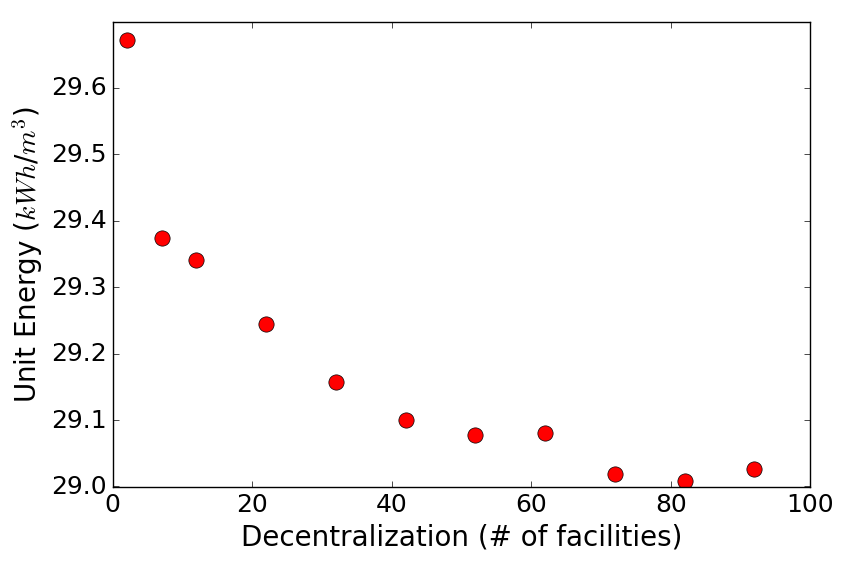

In [8]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

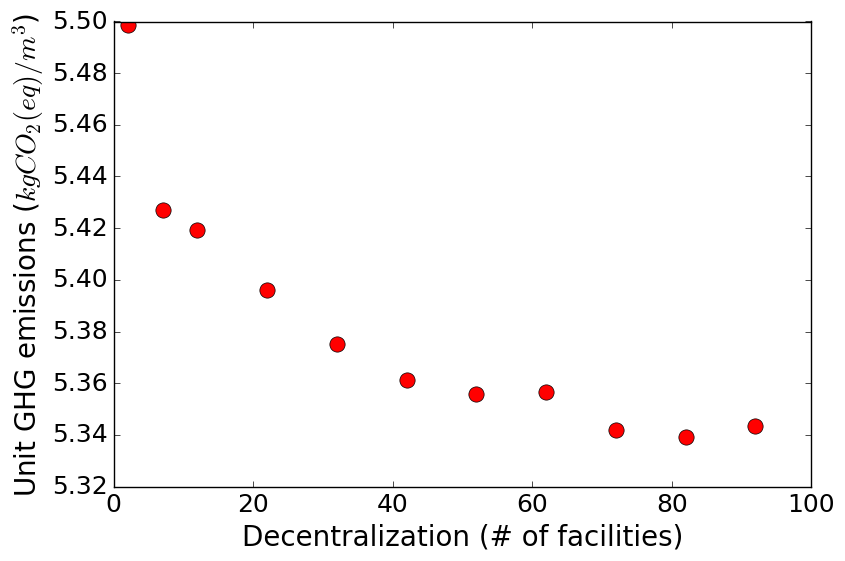

In [9]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

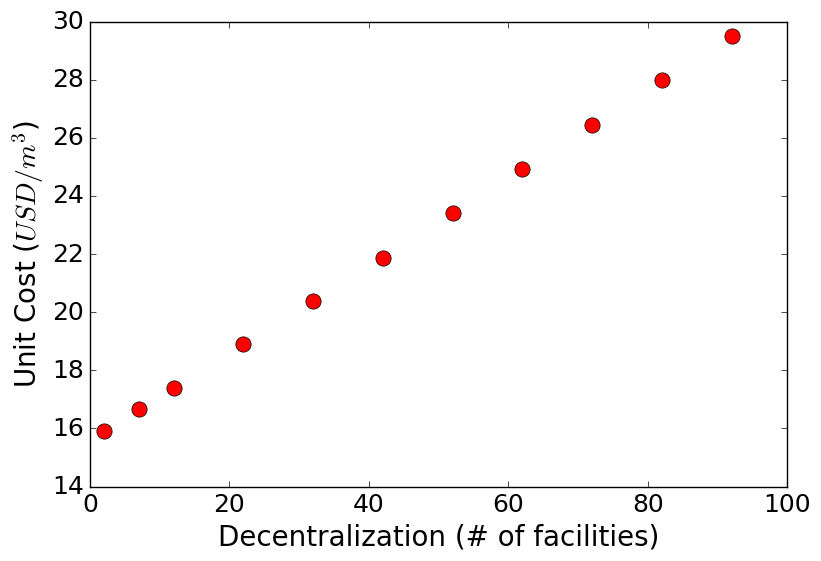

In [10]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_COST_m3["n_facilities"], Result_COST_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Cost ($USD/m^3$)', fontsize = 20)

In [11]:
Result_Energy_m3['number_facilities'] = Result_Energy_m3.n_facilities.astype(str)+ " facilities"
Result_GHG_m3['number_facilities'] = Result_GHG_m3.n_facilities.astype(str)+ " facilities"
Result_COST_m3['number_facilities'] = Result_COST_m3.n_facilities.astype(str)+ " facilities"

In [12]:
Labor_cost_min = Result_COST_m3['Labor'][0]
Labor_cost_max = Result_COST_m3.iloc[-1]['Labor']
Labor_cost_min

1.4595566757013496

In [13]:
Result_Energy_m3_plot = Result_Energy_m3.drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3.drop('sum',1).drop('n_facilities',1)
Result_COST_m3_plot = Result_COST_m3.drop('sum',1).drop('n_facilities',1).drop('Labor',1)

In [14]:
Fertilizer_offset_cost = Result_COST_m3_plot['Fertilizer offset'][0]
Fertilizer_offset_energy = Result_Energy_m3_plot['Fertilizer offset'][0]
Fertilizer_offset_GHG = Result_GHG_m3_plot['Fertilizer offset'][0]
print("Fertilizer_offset_cost %s "%Fertilizer_offset_cost)
print("Fertilizer_offset_energy %s "%Fertilizer_offset_energy)
print("Fertilizer_offset_GHG %s "%Fertilizer_offset_GHG)

Fertilizer_offset_cost -12.75 
Fertilizer_offset_energy -31.25 
Fertilizer_offset_GHG -13.5 


In [15]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Material transport'] + Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing']+Result_Energy_m3_plot['Bottling']+Result_Energy_m3_plot['Pump operation']+
                                 Result_Energy_m3_plot['Trucks manufacturing']+Result_Energy_m3_plot['Fertilizer transport'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Material transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing']+Result_GHG_m3_plot['Bottling']+Result_GHG_m3_plot['Pump operation']+
                              Result_GHG_m3_plot['Trucks manufacturing']+Result_GHG_m3_plot['Fertilizer transport'])
Result_COST_m3_plot['other'] = (Result_COST_m3_plot['Material transport'] + Result_COST_m3_plot['Tank manufacturing'] +
                                 Result_COST_m3_plot['Pump manufacturing']+
                                Result_COST_m3_plot['Bottling']+Result_COST_m3_plot['Pump operation']+
                               Result_COST_m3_plot['Trucks manufacturing']+Result_COST_m3_plot['Fertilizer transport'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing','Bottling', 'Pump operation', 'Fertilizer transport',
                                                    'Trucks manufacturing', 'Fertilizer offset'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing','Bottling', 'Pump operation', 'Fertilizer transport',
                                              'Trucks manufacturing', 'Fertilizer offset'] , 1)
Result_COST_m3_plot = Result_COST_m3_plot.drop(['Unnamed: 0','Material transport', 'Tank manufacturing',
                                                   'Pump manufacturing', 'Bottling', 'Pump operation','Fertilizer transport',
                                                'Trucks manufacturing', 'Fertilizer offset'] , 1)

In [16]:
Result_Energy_m3_plot['Renting facility space'] = 0
Result_GHG_m3_plot['Renting facility space'] = 0

In [17]:
Result_COST_m3_plot['Renting facility space '] = Result_COST_m3_plot['Renting facility space']
Result_COST_m3_plot = Result_COST_m3_plot.drop(['Renting facility space'] , 1)
Result_COST_m3_plot['other '] = Result_COST_m3_plot['other']
Result_COST_m3_plot = Result_COST_m3_plot.drop(['other'] , 1)
Result_Energy_m3_plot['other '] = Result_Energy_m3_plot['other']
Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['other'] , 1)
Result_GHG_m3_plot['other '] = Result_GHG_m3_plot['other']
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['other'] , 1)

In [18]:
Result_Energy_m3_plot_low = (Result_Energy_m3_plot[0:1])
Result_GHG_m3_plot_low = Result_GHG_m3_plot[0:1]
Result_COST_m3_plot_low = Result_COST_m3_plot[0:1]
Result_Energy_m3_plot_high = (Result_Energy_m3_plot[-1:])
Result_GHG_m3_plot_high = Result_GHG_m3_plot[-1:]
Result_COST_m3_plot_high = Result_COST_m3_plot[-1:]

In [19]:
energy_errors_1 = Result_Energy_m3_plot_low.copy().drop('number_facilities',1)
energy_errors_2 = Result_Energy_m3_plot_high.copy().drop('number_facilities',1)
ghg_errors_2 = Result_GHG_m3_plot_high.copy().drop('number_facilities',1)
ghg_errors_1 = Result_GHG_m3_plot_low.copy().drop('number_facilities',1)
cost_errors_1 = Result_COST_m3_plot_low.copy().drop('number_facilities',1)
cost_errors_2 = Result_COST_m3_plot_high.copy().drop('number_facilities',1)

In [20]:
energy_errors_1[energy_errors_1!=0] = 0 
energy_errors_1.set_value(energy_errors_1.index[0], 'other ', 4.2)
energy_errors_2[energy_errors_2!=0] = 0 
energy_errors_2.set_value(energy_errors_2.index[0], 'other ', 4.2)
ghg_errors_1[ghg_errors_1!=0] = 0 
ghg_errors_1.set_value(ghg_errors_1.index[0], 'other ', 1.1)
ghg_errors_2[ghg_errors_2!=0] = 0 
ghg_errors_2.set_value(ghg_errors_2.index[0], 'other ',1.1)
cost_errors_1[cost_errors_1!=0] = 0 
cost_errors_1.set_value(cost_errors_1.index[0], 'other ', 3.7)
cost_errors_2[cost_errors_2!=0] = 0 
cost_errors_2.set_value(cost_errors_2.index[0], 'other ', 3.7)

,Resin manufacturing,Cartridge manufacturing,Acid manufacturing,Cartridge collection,Renting facility space,other
10,0.0,0.0,0.0,0.0,0.0,3.7


In [21]:
Result_COST_m3_plot_low.sum(axis=1)

0    15.920635
dtype: float64

In [22]:
Result_COST_m3_plot_low

,Resin manufacturing,Cartridge manufacturing,Acid manufacturing,Cartridge collection,number_facilities,Renting facility space,other
0,0.83829,0.11624,4.305109,0.151772,2 facilities,10.272049,0.237174


In [23]:
Result_COST_m3_plot_high

,Resin manufacturing,Cartridge manufacturing,Acid manufacturing,Cartridge collection,number_facilities,Renting facility space,other
10,0.83829,0.11624,4.305109,0.103168,92 facilities,23.85513,0.299526


(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 8 Text yticklabel objects>)

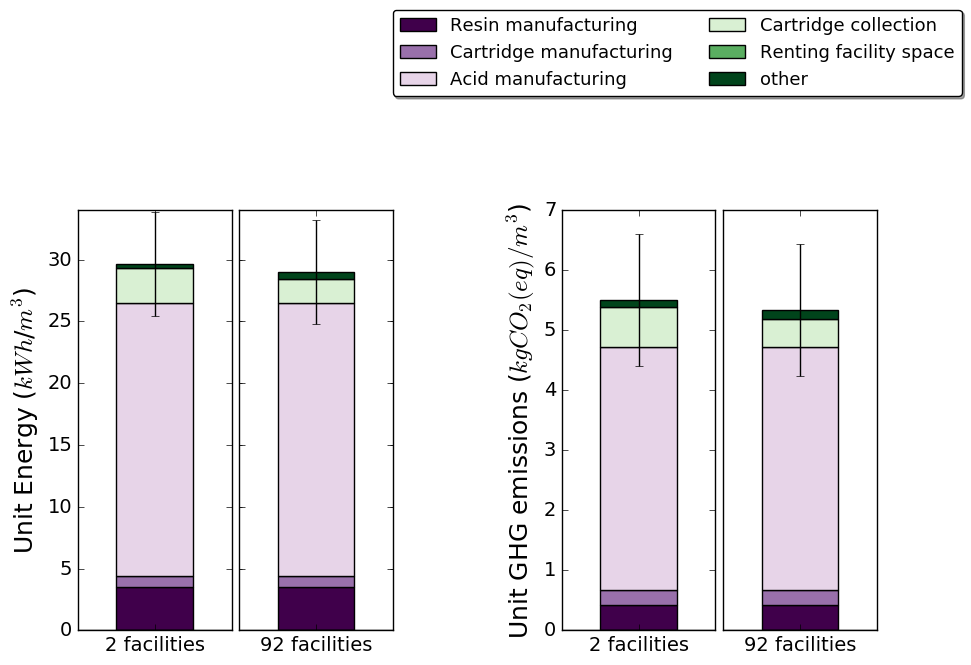

In [25]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1,5, 1)
a=Result_Energy_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=energy_errors_1)
a.set_xticklabels(Result_Energy_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.yticks(fontsize=14)
plt.ylim(0, 34)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,5, 2)
c=Result_Energy_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, sharey=True, legend=False,colormap='PRGn', yerr=energy_errors_2)
c.set_xticklabels(Result_Energy_m3_plot_high['number_facilities'],fontsize = 14, rotation = 0)
plt.ylim(0, 34)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,5, 4)
b=Result_GHG_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_1)
b.set_xticklabels(Result_GHG_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylim(0, 7)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
a.legend(loc='lower center', bbox_to_anchor=(3.9, 1.25),ncol=2, fancybox=True, shadow=True,fontsize=13)
ax = fig.add_subplot(1,5, 5)
d=Result_GHG_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_2)
d.set_xticklabels(Result_GHG_m3_plot_high['number_facilities'], fontsize = 14, rotation = 0)
d.get_yaxis().set_visible(False)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.ylim(0, 7)
fig.tight_layout()
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.yticks(fontsize=14)

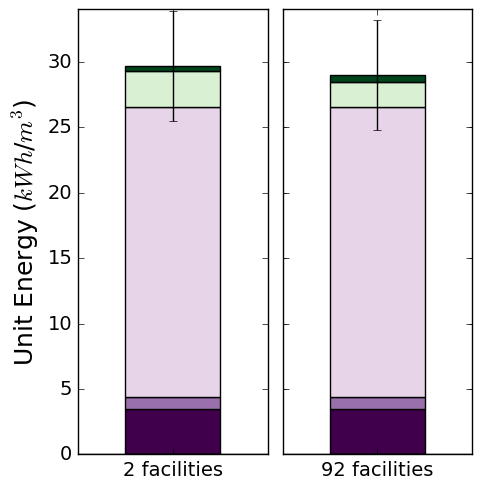

In [26]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,3, 1)
a=Result_Energy_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=energy_errors_1)
a.set_xticklabels(Result_Energy_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.yticks(fontsize=14)
plt.ylim(0, 34)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,3, 2)
c=Result_Energy_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, sharey=True, legend=False,colormap='PRGn', yerr=energy_errors_2)
c.set_xticklabels(Result_Energy_m3_plot_high['number_facilities'],fontsize = 14, rotation = 0)
plt.ylim(0, 34)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.yticks(fontsize=14)
fig.tight_layout()


In [27]:
a.legend(loc='lower center', bbox_to_anchor=(3.9, 1.25),ncol=2, fancybox=True, shadow=True,fontsize=13)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 8 Text yticklabel objects>)

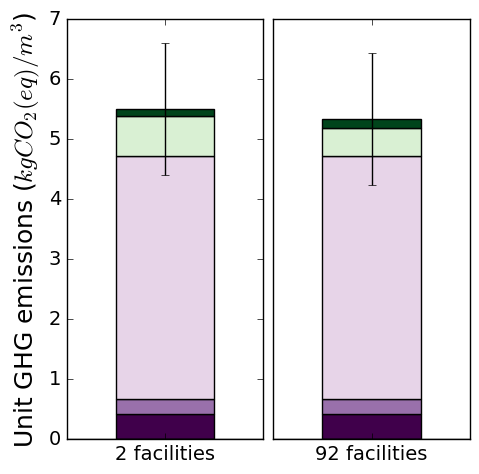

In [28]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,3, 1)
b=Result_GHG_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_1)
b.set_xticklabels(Result_GHG_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.yticks(fontsize=14)
plt.ylim(0, 7)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
a.legend(loc='lower center', bbox_to_anchor=(3.9, 1.25),ncol=2, fancybox=True, shadow=True,fontsize=13)
ax = fig.add_subplot(1,3, 2)
d=Result_GHG_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn', yerr=ghg_errors_2)
d.set_xticklabels(Result_GHG_m3_plot_high['number_facilities'], fontsize = 14, rotation = 0)
d.get_yaxis().set_visible(False)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.ylim(0, 7)
fig.tight_layout()
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.yticks(fontsize=14)

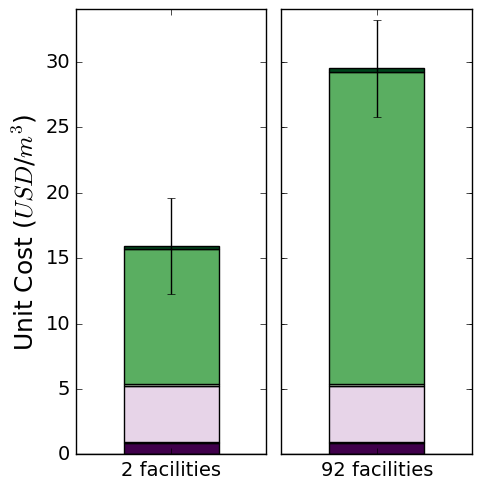

In [29]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1,3, 1)
a=Result_COST_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn',yerr=cost_errors_1)
a.set_xticklabels(Result_COST_m3_plot_low['number_facilities'],fontsize = 14, rotation = 0)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.text(2.3, 1,'Labor cost (2 facilities): 6.7 $USD/m^3$', transform = ax.transAxes, fontsize = 13)
plt.ylim(0, 34)
plt.ylabel('Unit Cost ($USD$/$m^3$)',fontsize=18)
#a.legend(loc='lower center', bbox_to_anchor=(1, 1.15),ncol=2, fancybox=True, shadow=True,fontsize=13)
ax = fig.add_subplot(1,3, 2)
c=Result_COST_m3_plot_high.plot(kind='bar', sharey=True, stacked = True,ax=ax, legend=False,colormap='PRGn',yerr=cost_errors_2)
c.set_xticklabels(Result_COST_m3_plot_high['number_facilities'],fontsize = 14, rotation = 0)
plt.ylim(0, 34)
plt.axhline(y=0, linewidth=1, color = 'k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.tight_layout()

In [52]:
Energy_optimal_log= Energy_optimal
Energy_optimal_log['logx'] = np.log(Energy_optimal_log['n_facilities'])
Energy_optimal_log['logEnergy'] = np.log(Energy_optimal_log['sum'])
energy_optimal = np.array(Energy_optimal_log['logEnergy'])
scale_optimal = np.array(Energy_optimal_log['logx'])

Energy_grid_log= Energy_grid
Energy_grid_log['logx'] = np.log(Energy_grid_log['n_facilities'])
Energy_grid_log['logEnergy'] = np.log(Energy_grid_log['sum'])
energy_grid = np.array(Energy_grid_log['logEnergy'])
scale_grid = np.array(Energy_grid_log['logx'])

Energy_random_log= Energy_random
Energy_random_log['logx'] = np.log(Energy_random_log['n_facilities'])
Energy_random_log['logEnergy'] = np.log(Energy_random_log['sum'])
energy_random = np.array(Energy_random_log['logEnergy'])
scale_random = np.array(Energy_random_log['logx'])

GHG_optimal_log = GHG_optimal
GHG_optimal_log['logx'] = np.log(GHG_optimal_log['n_facilities'])
GHG_optimal_log['logGHG'] = np.log(GHG_optimal_log['sum'])
ghg_optimal = np.array(GHG_optimal_log['logGHG'])

GHG_grid_log= GHG_grid
GHG_grid_log['logx'] = np.log(GHG_grid_log['n_facilities'])
GHG_grid_log['logGHG'] = np.log(GHG_grid_log['sum'])
ghg_grid = np.array(GHG_grid_log['logGHG'])

GHG_random_log= GHG_random
GHG_random_log['logx'] = np.log(GHG_random_log['n_facilities'])
GHG_random_log['logGHG'] = np.log(GHG_random_log['sum'])
ghg_random = np.array(GHG_random_log['logGHG'])

In [53]:
X_optimal = smf.add_constant(scale_optimal)
model = smf.OLS(energy_optimal , X_optimal)
results_optimal_energy = model.fit()

X_grid = smf.add_constant(scale_grid)
model = smf.OLS(energy_grid , X_grid)
results_grid_energy = model.fit()

X_random = smf.add_constant(scale_random)
model = smf.OLS(energy_random , X_random)
results_random_energy = model.fit()

X_optimal_GHG = smf.add_constant(scale_optimal)
model = smf.OLS(ghg_optimal , X_optimal_GHG)
results_optimal_GHG = model.fit()

X_grid_GHG = smf.add_constant(scale_grid)
model = smf.OLS(ghg_grid , X_grid_GHG)
results_grid_GHG = model.fit()

X_random_GHG = smf.add_constant(scale_random)
model = smf.OLS(ghg_random , X_random_GHG)
results_random_GHG = model.fit()

In [54]:
x1 = np.linspace(0,100, 500) # 100 linearly spaced numbers
y1_optimal = (x1**(results_optimal_energy.params[1]))*math.exp(results_optimal_energy.params[0])
aa=list(zip(x1,y1_optimal))
pl_optimal=pd.DataFrame(aa)
pl_optimal.columns=['x','isodistant']

y1_grid = (x1**(results_grid_energy.params[1]))*math.exp(results_grid_energy.params[0])
aa=list(zip(x1,y1_grid))
pl_grid=pd.DataFrame(aa)
pl_grid.columns=['x','grid']

y1_random = (x1**(results_random_energy.params[1]))*math.exp(results_random_energy.params[0])
aa=list(zip(x1,y1_random))
pl_random=pd.DataFrame(aa)
pl_random.columns=['x','random']

y1_optimal_GHG = (x1**(results_optimal_GHG.params[1]))*math.exp(results_optimal_GHG.params[0])
aa=list(zip(x1,y1_optimal_GHG))
pl_optimal_GHG=pd.DataFrame(aa)
pl_optimal_GHG.columns=['x','isodistant']

y1_grid_GHG = (x1**(results_grid_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_grid_GHG))
pl_grid_GHG=pd.DataFrame(aa)
pl_grid_GHG.columns=['x','grid']

y1_random_GHG = (x1**(results_random_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_random_GHG))
pl_random_GHG=pd.DataFrame(aa)
pl_random_GHG.columns=['x','random']

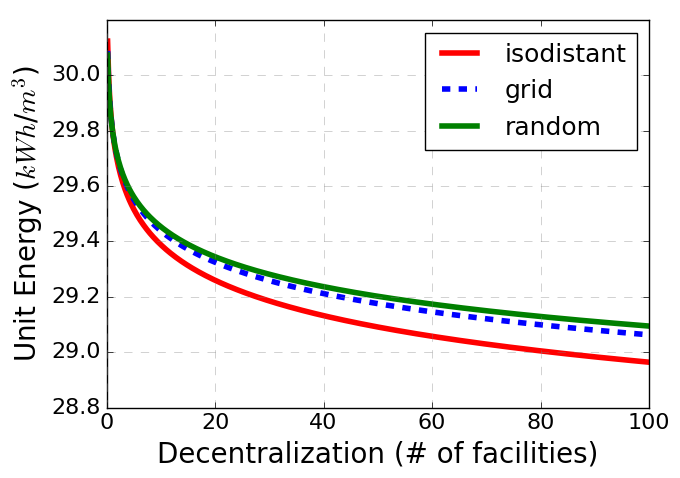

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
f = pl_optimal.plot( x='x', y='isodistant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

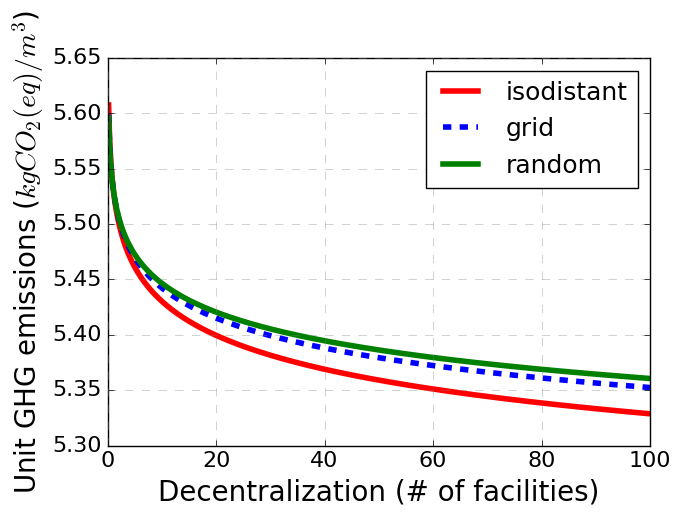

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
f = pl_optimal_GHG.plot( x='x', y='isodistant',fontsize=16, c='r', linestyle='-', ax=ax, linewidth=4, label='isodistant')
g = pl_grid_GHG.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4, label='grid')
h = pl_random_GHG.plot( x='x', y='random',fontsize=16, c='g', linestyle='-', ax=ax, linewidth=4, label='random')

h.legend(fontsize=18)
#plt.ylim(4.5, 5.1)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

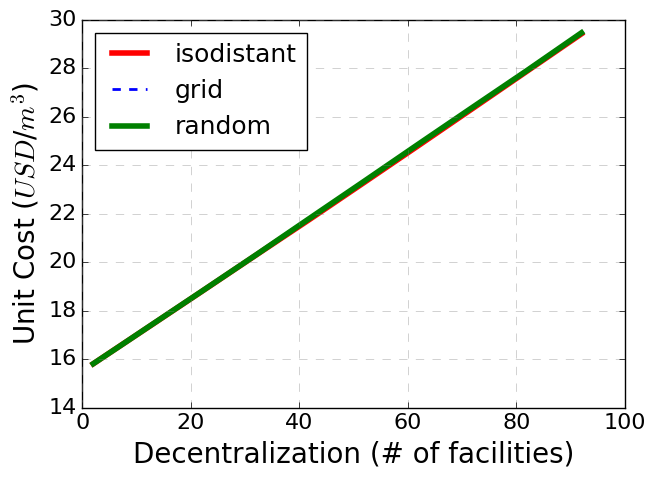

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
f = plt.plot( COST_optimal['n_facilities'], COST_optimal['sum'], c='r', linewidth=4, label = 'isodistant')
g = plt.plot( COST_grid['n_facilities'], COST_grid['sum'], c='b',linestyle='--', linewidth=2, label = 'grid')
h = plt.plot( COST_random['n_facilities'], COST_random['sum'], c='g', linewidth=4, label = 'random')
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Unit Cost ($USD$/$m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.legend(fontsize=18, loc='upper left')

In [58]:
cost_optimal = np.array(COST_optimal['sum'])
energy_optimal = np.array(Energy_optimal['sum'])
cost_grid = np.array(COST_grid['sum'])
energy_grid = np.array(Energy_grid['sum'])
cost_random = np.array(COST_random['sum'])
energy_random = np.array(Energy_random['sum'])
ghg_optimal_sum = np.array(GHG_optimal['sum'])
ghg_grid_sum = np.array(GHG_grid['sum'])
ghg_random_sum = np.array(GHG_random['sum'])

C:\Users\Olga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


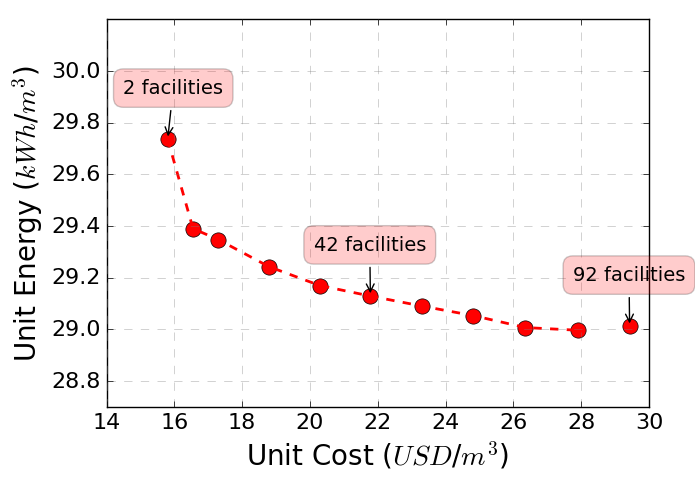

In [66]:
Xs_opt, Ys_opt = cost_optimal, energy_optimal
Xs_grid, Ys_grid = cost_grid, energy_grid
Xs_rand, Ys_rand = cost_random, energy_random
# Find lowest values for cost and highest for savings
p_front_optimal = pareto_frontier(Xs_opt, Ys_opt, maxX = False, maxY = True) 
p_front_grid = pareto_frontier(Xs_grid, Ys_grid, maxX = False, maxY = True) 
p_front_random = pareto_frontier(Xs_rand, Ys_rand, maxX = False, maxY = True) 
# Plot a scatter graph of all results
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
plt.plot(Xs_opt, Ys_opt,'ro', markersize=11)
plt.plot(p_front_optimal[0], p_front_optimal[1], 'r--', linewidth=2)
#plt.plot(Xs_rand, Ys_rand,'g^', markersize=11, label = 'random')
#plt.plot(p_front_random[0], p_front_random[1], 'g--', label = 'Pareto curve (random)', linewidth=2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(28.7,30.2)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=20)
plt.xlabel('Unit Cost ($USD$/$m^3$)',fontsize=20)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.legend(fontsize = 16)
labels = ['{0} facilities'.format(i) for i in Energy_optimal['n_facilities']]
for label, x, y in list(zip(labels, Xs_opt, Ys_opt)):
    if (label == '2 facilities') or (label == '42 facilities') or (label == '92 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (40, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
'''
for label, x, y in list(zip(labels, Xs_rand, Ys_rand)):
    if (label == '32 facilities')  or (label == '92 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (80, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
'''
plt.show()

C:\Users\Olga\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


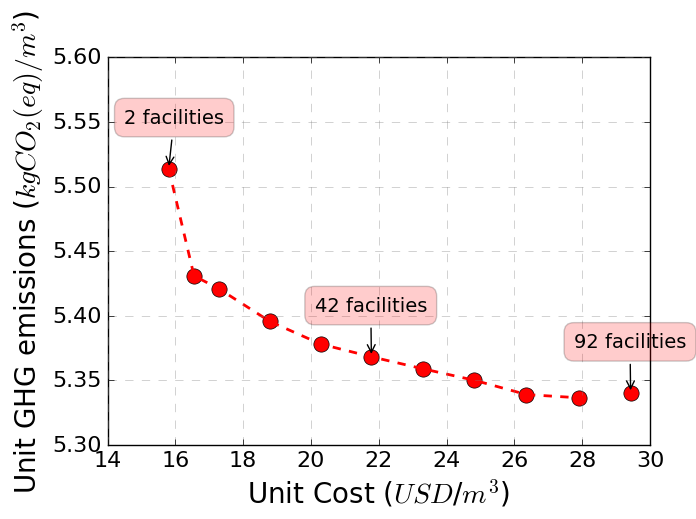

In [67]:
Xs_opt, Ys_opt = cost_optimal, ghg_optimal_sum
Xs_grid, Ys_grid = cost_grid, ghg_grid_sum
Xs_rand, Ys_rand = cost_random, ghg_random_sum
# Find lowest values for cost and highest for savings
p_front_optimal = pareto_frontier(Xs_opt, Ys_opt, maxX = False, maxY = True) 
p_front_grid = pareto_frontier(Xs_grid, Ys_grid, maxX = False, maxY = True) 
p_front_random = pareto_frontier(Xs_rand, Ys_rand, maxX = False, maxY = True) 
# Plot a scatter graph of all results
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(7, 5))
plt.plot(Xs_opt, Ys_opt,'ro', markersize=11)
plt.plot(p_front_optimal[0], p_front_optimal[1], 'r--', linewidth=2)
#plt.plot(Xs_rand, Ys_rand,'g^', markersize=11, label = 'random')
#plt.plot(p_front_random[0], p_front_random[1], 'g--', label = 'Pareto curve (random)', linewidth=2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(5.3, 5.6)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=20)
plt.xlabel('Unit Cost ($USD$/$m^3$)',fontsize=20)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.legend(fontsize = 16)
labels = ['{0} facilities'.format(i) for i in Energy_optimal['n_facilities']]
for label, x, y in list(zip(labels, Xs_opt, Ys_opt)):
    if (label == '2 facilities') or (label == '42 facilities') or (label == '92 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (40, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'red', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
'''
for label, x, y in list(zip(labels, Xs_rand, Ys_rand)):
    if (label == '35 facilities') or (label == '80 facilities'):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (80, 30),
            textcoords = 'offset points', ha = 'right', va = 'bottom', 
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'green', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'), fontsize = 14)
'''
plt.show()